# Relationships, Multivariate

The coral reefs of Guam are very important to the health of the surrounding waters. They provide food and shelter for many ocean species, and are vulnerable to pollution, water temperature, and damaging fishing techniques.

## Data

The National Centers for Environmental Information (NCEI) and National Oceanic and Atmospheric Administration (NOAA) offer a [dataset](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.nodc%3A0244405/html) from the Guam Long-term Coral Reef Monitoring Program (GLTMP). This dataset contains survey information from several coral reefs around Guam and includes size and depth information, as well as recent and old dead coral counts.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

df = pd.read_csv("GLTMP_corals_2010-2019.csv")
print(df.shape)

# Removing any rows that have blank values for specific columns
columns = ["DEPTH",
           "CORAL_CODE",
           "COLONY_LENGTH",
           "COLONY_WIDTH",
           "OLD_DEAD",
           "RECENT_DEAD"]
df = df.dropna(subset=columns)

# Grabbing the list of most common species
num_species = 10
top_species = list(df.groupby(by="SCIENTIFIC_NAME").count().nlargest(n=num_species, columns="DEPTH").index)
df = df[df["SCIENTIFIC_NAME"].isin(top_species)]

# Setting colors based on colormap
color_map = {genus: cm.tab10(i) for i, genus in enumerate(top_species)}
df['COLORS'] = df['SCIENTIFIC_NAME'].map(color_map)

df.value_counts(subset="SCIENTIFIC_NAME")

(22209, 45)


/tmp/ipykernel_269809/3311103491.py:6: DtypeWarning: Columns (34,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("GLTMP_corals_2010-2019.csv")


SCIENTIFIC_NAME
Porites rus              8795
Porites spp - massive    3846
Leptastrea purpurea      1340
Leptastrea spp            843
Favia spp                 744
Galaxea fascicularis      401
Porites spp               364
Porites deformis          354
Montipora spp             326
Porites lichen            299
dtype: int64

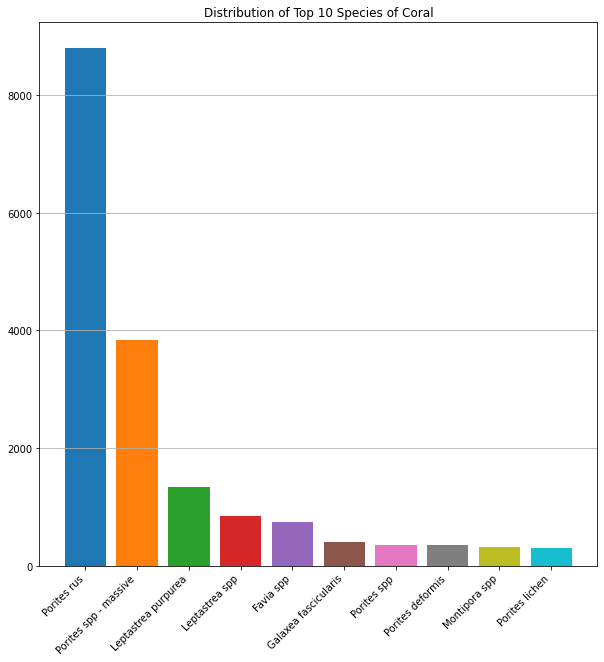

In [2]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')

counts = df.value_counts(subset="SCIENTIFIC_NAME")
n = np.arange(len(counts))
colors = [color_map[species] for species in counts.index]

ax.bar(n, counts, color=colors)
ax.set_xticks(n, list(counts.index), rotation=45, ha='right')
ax.grid(axis='y')
plt.title("Distribution of Top 10 Species of Coral")
plt.show()

/tmp/ipykernel_269809/2989720656.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter = pd.plotting.scatter_matrix(df[plotting_columns],


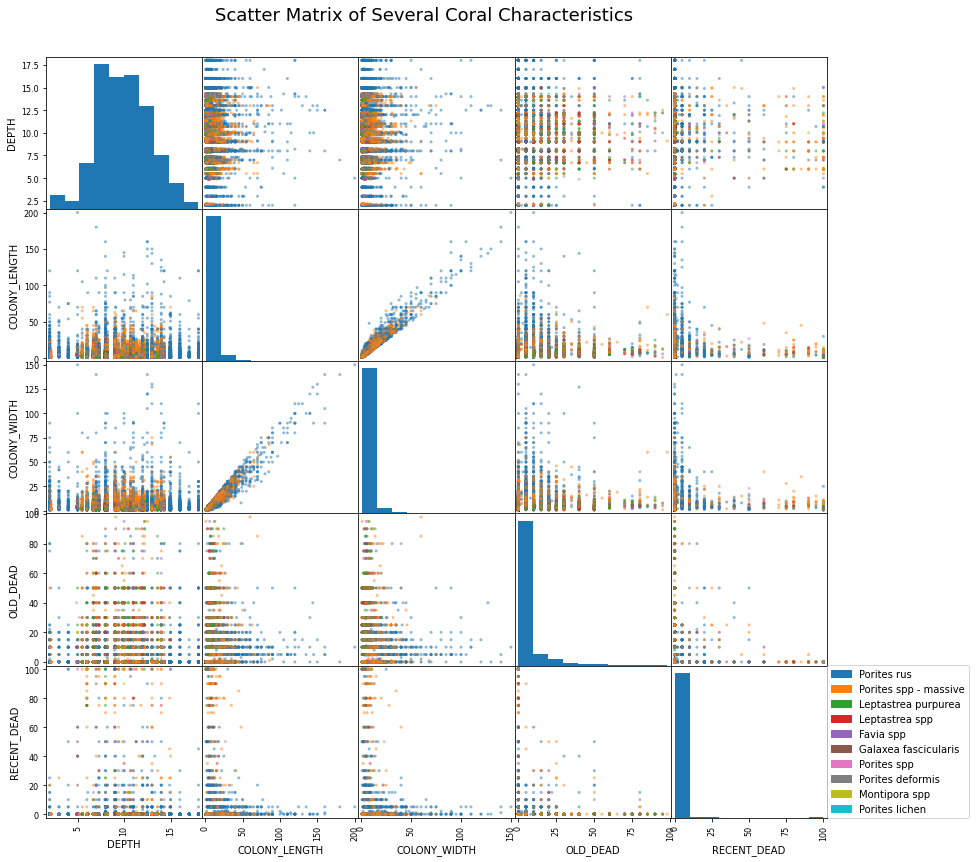

In [3]:
import matplotlib.patches as mpatches

plotting_columns = ["DEPTH",
                    "CORAL_CODE",
                    "COLONY_LENGTH",
                    "COLONY_WIDTH",
                    "OLD_DEAD",
                    "RECENT_DEAD"]

fig, ax = plt.subplots(figsize=(14, 14), facecolor='white')

scatter = pd.plotting.scatter_matrix(df[plotting_columns],
                                     ax=ax,
                                     c=df["COLORS"],
                                     label=top_species)

# building legend manually
patches = []
for label, color in color_map.items():
    patches.append(mpatches.Patch(color=color, label=label))
plt.legend(handles=patches, loc=(1, 0))

plt.suptitle("Scatter Matrix of Several Coral Characteristics", fontsize=18, y=0.93)
plt.show()

## Scatter Matrix

There are a few insights that can be gleaned from the scatter matrix. Length and width of colonies are very heavily correlated. Coral seems to like to grow up slightly more than out.

Also, the most common species (Porites rus) appears to have the widest range of depth although that might be an artifact of it being the most common and therefore statistically more likely to occupy all depths. 

There is also a small connection between the coral's ideal depth (10m) and an increased length/width.

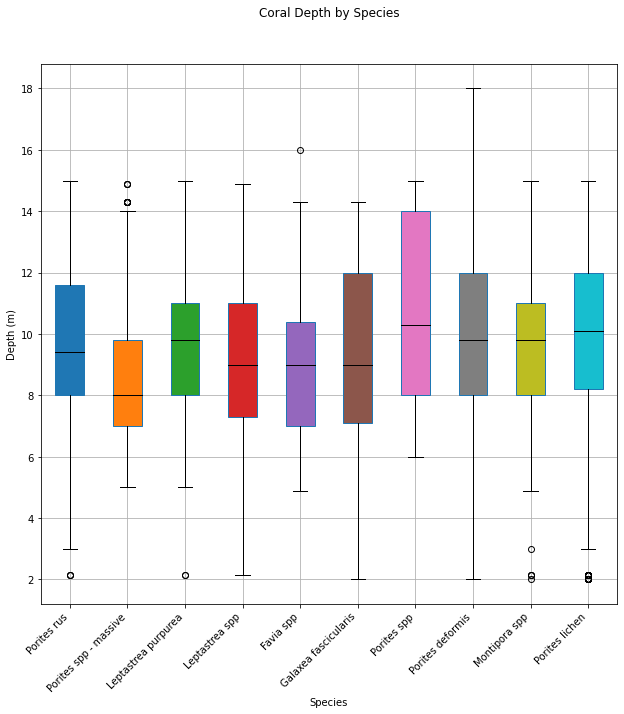

In [4]:
# boxplot of coral species vs depth

fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')

box = df.boxplot(column="DEPTH",
                 by="SCIENTIFIC_NAME",
                 ax=ax,
                 patch_artist=True,
                 capprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 flierprops=dict(color='black', markeredgecolor='black'),
                 medianprops=dict(color='black'))

# fill with colors
colors = [color_map[species] for species in top_species]
for patch, color in zip(box.patches, colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Species')
ax.set_ylabel('Depth (m)')
ax.set_xticklabels(labels=top_species, rotation=45, ha='right')
plt.title("")
plt.suptitle("Coral Depth by Species")
plt.show()

## Boxplot of coral depths

The average coral species depth is right around 10m, with Porites deformis enjoying the largest range of habitats and Porites spp having the smallest.